In [1]:
!pip install --upgrade tdmclient

import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline

In [2]:
# Matrix conversion to have dimensions, start and goal positions

def conversion(matrix):

    # Put matrix into numpy array (in case not already)
    arr = np.array(matrix)
    
    # Find the indices of start and goal
    start_arr = np.where(arr == 3)
    goal_arr = np.where(arr == 4)
    
    # Verify there is exactly one 3 and one 4 in the matrix
    if len(start_arr[0]) != 1 or len(goal_arr[0]) != 1:
        print("Error: There should be exactly one start and one goal on the field.")
        return None
    
    # Get the height, width, and positions of start and goal
    max_val_x, max_val_y = arr.shape
    start = (start_arr[0][0], start_arr[1][0])
    goal = (goal_arr[0][0], goal_arr[1][0])

    # Replace the positions of 3 and 4 with 0
    arr[start] = 0
    arr[goal] = 0

    return max_val_x, max_val_y, start, goal, arr

In [3]:
# Example conversion

matrix = [
    [1, 0, 3],
    [1, 0, 1],
    [4, 0, 0]
]

result = conversion(matrix)

max_val_x, max_val_y, start, goal, occupancy_grid = result
print(f"Height: {max_val_x}, Width: {max_val_y}")
print(f"Position of start: {start}, Position of goal: {goal}")
print("Modified Matrix:")
print(occupancy_grid)

Height: 3, Width: 3
Position of start: (0, 2), Position of goal: (2, 0)
Modified Matrix:
[[1 0 0]
 [1 0 1]
 [0 0 0]]


In [4]:
# Creating inputs for testing

max_val_x = 50
max_val_y = 50
start = (0,0)
goal = (19,39)

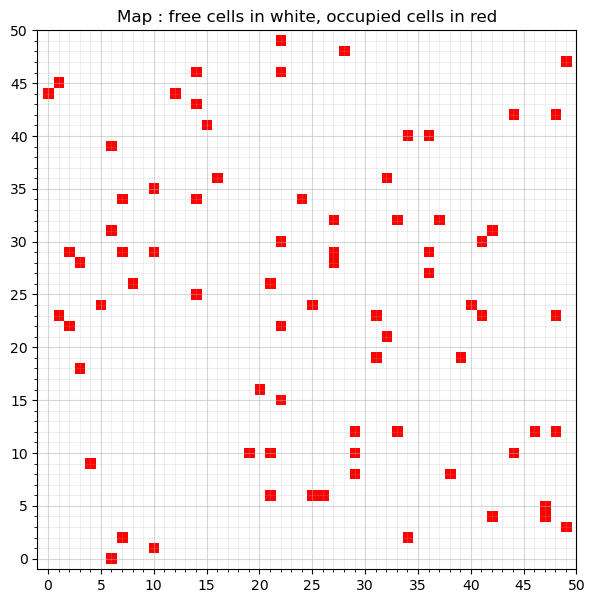

In [5]:
# Creating the occupancy_grid for testing

def create_empty_plot_test(max_val_x, max_val_y):
    """
    Helper function to create a figure of the desired dimensions & grid
    
    :param max_val_x and max_val_y: dimension of the map along the x and y dimensions
    :return: the fig and ax objects.
    """
    fig, ax = plt.subplots(figsize=(7,7))
    
    major_ticks_x = np.arange(0, max_val_x+1, 5)
    minor_ticks_x = np.arange(0, max_val_x+1, 1)
    major_ticks_y = np.arange(0, max_val_y+1, 5)
    minor_ticks_y = np.arange(0, max_val_y+1, 1)
    ax.set_xticks(major_ticks_x)
    ax.set_xticks(minor_ticks_x, minor=True)
    ax.set_yticks(major_ticks_y)
    ax.set_yticks(minor_ticks_y, minor=True)
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)
    ax.set_ylim([-1,max_val_y])
    ax.set_xlim([-1,max_val_x])
    ax.grid(True)
    
    return fig, ax

fig, ax = create_empty_plot_test(max_val_x, max_val_y)

# Creating the occupancy grid
data = np.random.rand(max_val_x, max_val_y) * 100 # Create a grid of random values
cmap = colors.ListedColormap(['white', 'red']) # Select the colors with which to display obstacles and free cells

# Converting the random values into occupied and free cells
limit = 97 # adjust for probability of no obstacle (out of 100)
occupancy_grid = data.copy()
occupancy_grid[data>limit] = 1
occupancy_grid[data<=limit] = 0

# Displaying the map
ax.imshow(occupancy_grid.transpose(), cmap=cmap)
plt.title("Map : free cells in white, occupied cells in red");

In [6]:
# Helper function to create a grid of desired dimensions

def create_empty_plot(max_val_x, max_val_y):
    """
    Helper function to create a figure of the desired dimensions & grid
    
    :param max_val_x and max_val_y: dimension of the map along the x and y dimensions
    :return: the fig and ax objects.
    """
    fig, ax = plt.subplots(figsize=(7,7))
    
    major_ticks_x = np.arange(0, max_val_x+1, 5)
    minor_ticks_x = np.arange(0, max_val_x+1, 1)
    major_ticks_y = np.arange(0, max_val_y+1, 5)
    minor_ticks_y = np.arange(0, max_val_y+1, 1)
    ax.set_xticks(major_ticks_x)
    ax.set_xticks(minor_ticks_x, minor=True)
    ax.set_yticks(major_ticks_y)
    ax.set_yticks(minor_ticks_y, minor=True)
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)
    ax.set_ylim([-1,max_val_y])
    ax.set_xlim([-1,max_val_x])
    ax.grid(True)
    
    return fig, ax

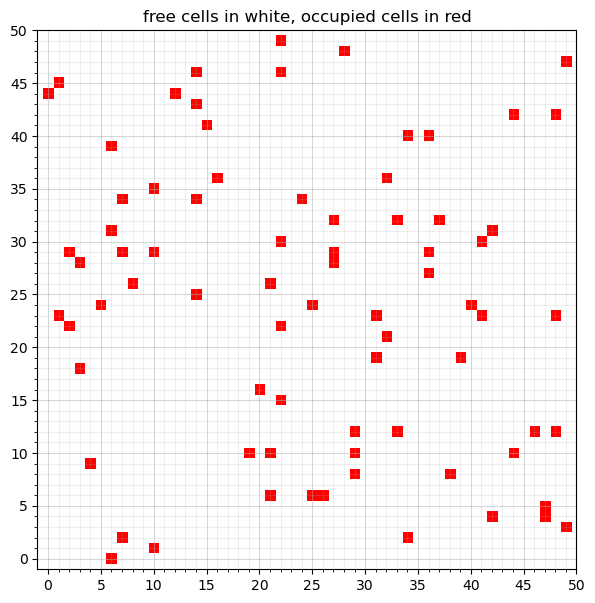

In [7]:
# Displaying the occupancy_grid

fig, ax = create_empty_plot(max_val_x, max_val_y)
ax.imshow(occupancy_grid.transpose(), cmap=cmap)
plt.title("free cells in white, occupied cells in red");

In [8]:
# Grow the obstacles by half the robots radius to avoid collision

def grow_obstacles(matrix, size):
    # Matrix to a numpy array (in case not already)
    arr = np.array(matrix)

    # New matrix with the same shape and filled with zeros
    expanded_matrix = np.zeros_like(arr)

    # Find the indices of obstacles (value = 1) in the original matrix
    obstacle_indices = np.where(arr == 1)

    # Grow obstacles in the expanded matrix
    for i, j in zip(obstacle_indices[0], obstacle_indices[1]):
        # Range for the expanded obstacles
        row_range = slice(max(0, i - size), min(arr.shape[0], i + size + 1))
        col_range = slice(max(0, j - size), min(arr.shape[1], j + size + 1))

        # Setting the corresponding elements to 1 in expanded matrix
        expanded_matrix[row_range, col_range] = 1

    return expanded_matrix


In [9]:
# Example usage of the growth function:

matrix_with_obstacles = [
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0],
]

# Set the size by which you want to grow the obstacles
growth_size = 1

# Grow the obstacles in the matrix
expanded_matrix = grow_obstacles(matrix_with_obstacles, growth_size)

# Print original and expanded matrices
print("Original Matrix:")
print(np.array(matrix_with_obstacles))
print("\nExpanded Matrix:")
print(expanded_matrix)

Original Matrix:
[[0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 0 0 0]]

Expanded Matrix:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 0 0]]


In [10]:
# Grow obstacles on the occupancy_grid by the robot_radius

# For testing purposes
robot_radius = 2

original_grid = occupancy_grid
occupancy_grid = grow_obstacles(occupancy_grid, robot_radius)

In [11]:
# Pick new start and goal so that they are free; for testing purposes only

grid_array = np.array(occupancy_grid)

# Find the indices of free cells (value = 0)
free_indices = np.transpose(np.where(grid_array == 0))

if len(free_indices) < 2:
    print("Error: Not enough free cells for start and end positions.")

# Randomly pick two different positions
np.random.shuffle(free_indices)
start = tuple(free_indices[0])
goal = tuple(free_indices[1])

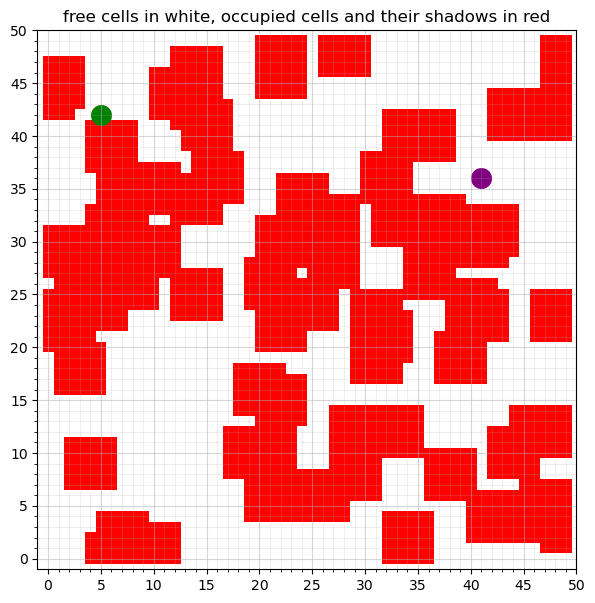

In [12]:
# Displaying the map with the augmented obstacles

fig, ax = create_empty_plot(max_val_x, max_val_y)
ax.imshow(occupancy_grid.transpose(), cmap=cmap)
ax.scatter(start[0], start[1], marker="o", color = 'green', s=200);
ax.scatter(goal[0], goal[1], marker="o", color = 'purple', s=200);
plt.title("free cells in white, occupied cells and their shadows in red");

In [13]:
# All together to find the best path (main output: path):

# Inputs: max_val_x, max_value_y, occupancy_grid, start, goal

def reconstruct_path(cameFrom, current):
    """
    Recurrently reconstructs the path from start node to the current node
    :param cameFrom: map (dictionary) containing for each node n the node immediately 
                     preceding it on the cheapest path from start to n 
                     currently known.
    :param current: current node (x, y)
    :return: list of nodes from start to current node
    """
    total_path = [current]
    while current in cameFrom.keys():
        # Add where the current node came from to the start of the list
        total_path.insert(0, cameFrom[current]) 
        current=cameFrom[current]
    return total_path

def A_Star(start, goal, h, coords, occupancy_grid, max_val_x = max_val_x, max_val_y = max_val_y):
    """
    A* for 2D occupancy grid. Finds a path from start to goal.
    h is the heuristic function. h(n) estimates the cost to reach goal from node n.
    :param start: start node (x, y)
    :param goal_m: goal node (x, y)
    :param occupancy_grid: the grid map
    :return: a tuple that contains: (the resulting path in meters, the resulting path in data array indices) -> ???
    """
    
    # Check if the start and goal are within the boundaries of the map
    for point in [start, goal]:
        assert point >= (0, 0) and point[0] < max_val_x and point[1] < max_val_y, "start or end goal not contained in the map"
    
    # check if start and goal nodes correspond to free spaces
    if occupancy_grid[start[0], start[1]]:
        raise Exception('Start node is not traversable')

    if occupancy_grid[goal[0], goal[1]]:
        raise Exception('Goal node is not traversable')
    
    # get the possible movements
    s2 = math.sqrt(2)
    movements = [(1, 0, 1.0), (0, 1, 1.0), (-1, 0, 1.0), (0, -1, 1.0), 
                (1, 1, s2), (-1, 1, s2), (-1, -1, s2), (1, -1, s2)]
    
    # The set of visited nodes that need to be (re-)expanded, i.e. for which the neighbors need to be explored
    # Initially, only the start node is known.
    openSet = [start]
    
    # The set of visited nodes that no longer need to be expanded.
    closedSet = []

    # For node n, cameFrom[n] is the node immediately preceding it on the cheapest path from start to n currently known.
    cameFrom = dict()

    # For node n, gScore[n] is the cost of the cheapest path from start to n currently known.
    gScore = dict(zip(coords, [np.inf for x in range(len(coords))]))
    gScore[start] = 0

    # For node n, fScore[n] := gScore[n] + h(n). map with default value of Infinity
    fScore = dict(zip(coords, [np.inf for x in range(len(coords))]))
    fScore[start] = h[start]

    # while there are still elements to investigate
    while openSet != []:
        
        #the node in openSet having the lowest fScore[] value
        fScore_openSet = {key:val for (key,val) in fScore.items() if key in openSet}
        current = min(fScore_openSet, key=fScore_openSet.get)
        del fScore_openSet
        
        #If the goal is reached, reconstruct and return the obtained path
        if current == goal:
            return reconstruct_path(cameFrom, current), closedSet

        openSet.remove(current)
        closedSet.append(current)
        
        #for each neighbor of current:
        for dx, dy, deltacost in movements:
            
            neighbor = (current[0]+dx, current[1]+dy)
            
            # if the node is not in the map, skip
            if (neighbor[0] >= occupancy_grid.shape[0]) or (neighbor[1] >= occupancy_grid.shape[1]) or (neighbor[0] < 0) or (neighbor[1] < 0):
                continue
            
            # if the node is occupied or has already been visited, skip
            if (occupancy_grid[neighbor[0], neighbor[1]]) or (neighbor in closedSet): 
                continue
                
            # d(current,neighbor) is the weight of the edge from current to neighbor
            # tentative_gScore is the distance from start to the neighbor through current
            tentative_gScore = gScore[current] + deltacost
            
            if neighbor not in openSet:
                openSet.append(neighbor)
                
            if tentative_gScore < gScore[neighbor]:
                # This path to neighbor is better than any previous one. Record it!
                cameFrom[neighbor] = current
                gScore[neighbor] = tentative_gScore
                fScore[neighbor] = gScore[neighbor] + h[neighbor]

    # Open set is empty but goal was never reached
    print("No path found to goal")
    return [], closedSet

def heuristics(max_val_x, max_val_y):
    # List of all coordinates in the grid
    x,y = np.mgrid[0:max_val_x:1, 0:max_val_y:1]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    pos = np.reshape(pos, (x.shape[0]*x.shape[1], 2))
    coords = list([(int(x[0]), int(x[1])) for x in pos])

    # Define the heuristic, here = distance to goal ignoring obstacles (Euclidean)
    h = np.linalg.norm(pos - goal, axis=-1)
    h = dict(zip(coords, h))
    return h, coords


In [14]:
# Run the A* algorithm

h, coords = heuristics(max_val_x, max_val_y)
path, visitedNodes = A_Star(start, goal, h, coords, occupancy_grid)
path = np.array(path).reshape(-1, 2).transpose()
visitedNodes = np.array(visitedNodes).reshape(-1, 2).transpose()

[[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 19 19 20 21 22 23 24 25 26
  27 28 29 30 31 32 33 34 35 36 37 38 39 39 39 40 40 40 41]
 [42 43 44 45 46 47 48 49 49 49 49 49 48 47 46 45 44 43 43 43 43 43 43 43
  43 43 43 43 43 43 43 43 43 43 43 43 42 41 40 39 38 37 36]]


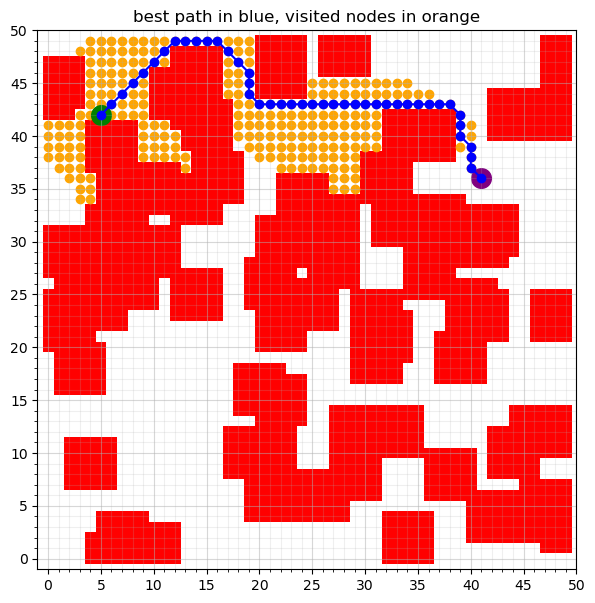

In [15]:
# Displaying the map
fig_astar, ax_astar = create_empty_plot(max_val_x, max_val_y)
ax_astar.imshow(occupancy_grid.transpose(), cmap=cmap)

# Plot the best path found and the list of visited nodes
ax_astar.scatter(visitedNodes[0], visitedNodes[1], marker="o", color = 'orange');
ax_astar.plot(path[0], path[1], marker="o", color = 'blue');
ax_astar.scatter(start[0], start[1], marker="o", color = 'green', s=200);
ax_astar.scatter(goal[0], goal[1], marker="o", color = 'purple', s=200);
plt.title("best path in blue, visited nodes in orange");

# The list with the best path
print(path)

In [16]:
# Overall call with input: matrix and output: path, without displaying

def global_path(matrix):
    max_val_x, max_val_y, start, goal, original_grid = conversion(matrix)

    # Grow the obstacles in the matrix
    growth_size = 1 # size of robot radius (in grid dimension) (would be 5.5cm)
    occupancy_grid = grow_obstacles(original_grid, growth_size)

    # Calling A*
    h, coords = heuristics(max_val_x, max_val_y)
    path, visitedNodes = A_Star(start, goal, h, coords, occupancy_grid)
    path = np.array(path).reshape(-1, 2).transpose()
    
    return path

In [17]:
# Example call with example grid

matrix = [
    [0, 1, 0, 0, 0, 0, 1, 0, 0, 4],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [3, 0, 0, 0, 0, 0, 0, 0, 0, 1],
]

global_path(matrix)

array([[3, 3, 3, 3, 3, 3, 3, 2, 1, 0],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])